In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Exercise 1a)
Implement AdaBoost to classify the generated data. Achieve at least an accuracy of 75% on the test set. [3 Points]

In [2]:
from sklearn.model_selection import train_test_split
X_0=np.load("Features.npy")
y=np.load("Labels.npy")


# binarize the features: use all possible values as thresholds on all axes
def axis_aligned_features(X):
    X_features = None
    for i in range(X.shape[1]):
        distinct_vals = sorted(np.unique(X[:,i]))
        thresholds = [(x + y)/2 for x,y in zip(iter(distinct_vals), iter(distinct_vals[1::]))]
        for t in thresholds:
            mask = X[:,i] > t
            if X_features is not None:
                X_features = np.concatenate([X_features, mask.reshape((-1,1))], axis=1)
            else:
                X_features = mask.reshape((-1,1))
    return X_features

X = axis_aligned_features(X_0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y, test_size=100, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=100, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(800, 1998)
(100, 1998)
(100, 1998)


In [3]:
class AdaBoost:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        w = np.ones(n_samples) / n_samples

        for estimator in range(self.n_estimators):
            classifier = self.train_stump(X, y, w)

            pred = classifier["pred"]
            err = np.sum(w * (pred != y)) / np.sum(w)

            alpha = 0.5 * np.log((1- err) / max(err, 1e-10))

            w = w * np.exp(-alpha * y * pred)
            w /= np.sum(w)

            self.models.append(classifier)
            self.alphas.append(alpha)

    def predict(self, X):
        final_pred = np.zeros(X.shape[0])
        for alpha, classifier in zip(self.alphas, self.models):
            final_pred += alpha * classifier["pred_func"](X)
        return np.sign(final_pred)
    
    def train_stump(self, X, y, w):
        classifier = DecisionTreeClassifier(max_depth=1)
        classifier.fit(X, y, sample_weight=w)
        pred = classifier.predict(X)
        return {"pred_func": classifier.predict, "pred": pred, "error": None}

In [14]:
adaBoost = AdaBoost(n_estimators=10)
adaBoost.fit(X_train, y_train)

train_acc = np.mean(adaBoost.predict(X_train) == y_train)
val_acc = np.mean(adaBoost.predict(X_val) == y_val)
test_acc = np.mean(adaBoost.predict(X_test) == y_test)

print(f"Training accuracy: {train_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")
print(f"Test accuracy: {test_acc*100:.2f}%")

Training accuracy: 84.31%
Validation accuracy: 82.00%
Test accuracy: 82.20%


# Exercise 1b)
Use your implementation of AdaBoost to classify the face data. Achieve at least an accuracy of 75% on the test set. [2 Points]

In [5]:
data=np.load("train.npy")
X_train, X_test, y_train, y_test = train_test_split(data[:,1:], data[:,0], test_size=500, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=500, random_state=42)

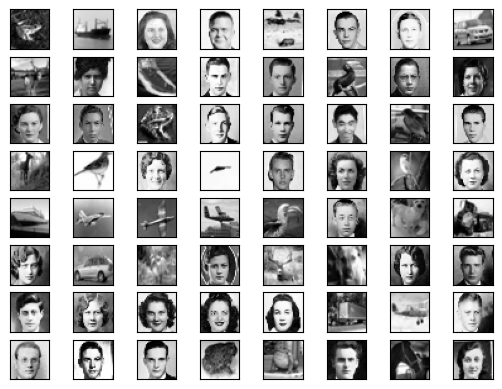

In [6]:
counter=1
for i in range(8):
    for j in range(8):
        ax = plt.gcf().add_subplot(8, 8, counter, aspect="equal")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        img=X_train[counter-1].reshape((32,32))
        ax.imshow(
                    img,
                    cmap="gray",
                )
        counter+=1
plt.show()

In [7]:
adaBoost = AdaBoost(n_estimators=10)
adaBoost.fit(X_train, y_train)

In [12]:
val_acc = np.mean(adaBoost.predict(X_val) == y_val)
train_acc = np.mean(adaBoost.predict(X_train) == y_train)
test_acc = np.mean(adaBoost.predict(X_test) == y_test)

print(f"Validation accuracy: {val_acc*100:.2f}%")
print(f"Train accuracy: {train_acc*100:0.2f}%")
print(f"test_accuracy: {test_acc*100:0.2f}%")

Validation accuracy: 82.00%
Train accuracy: 84.31%
test_accuracy: 82.20%
